In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/AssignmentPWskills/BIKE DETAILS.csv'
import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**EDA ASSIGNMENT**

## 1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)



In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv(file_path)
print('shape of the dataset :',df.shape)
print('columns present in dataset:  ',df.columns)
print('the first 10 rows:')
df.head(10)




shape of the dataset : (1061, 7)
columns present in dataset:   Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')
the first 10 rows:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


## 2.  Check for missing values in all columns and describe your approach for handling them.



In [ ]:
print("Missing values in each column:\n")
print(df.isnull().sum())


print("\nPercentage of missing values:\n")
print((df.isnull().sum() / len(df)) * 100)

Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:

name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


Only the column ex_showroom_price had missing values (435).
Since it is a numerical variable with likely outliers, I handled the missing values by replacing them with the median value of the column.
This approach preserves all records and maintains the overall distribution of the data.

In [ ]:
df['ex_showroom_price']=df['ex_showroom_price'].fillna(df['ex_showroom_price'].median())


## 3.  Plot the distribution of selling prices using a histogram and describe the overall trend.
(Include your Python code and output in the code box below.)

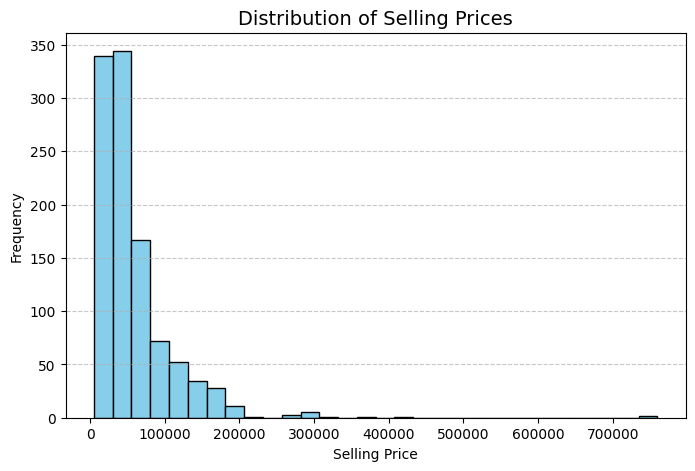

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices', fontsize=14)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

OBSERVATION: - The distribution of selling prices shows a right-skewed pattern, meaning:
- Majority of bikes are priced at the lower end, indicating a market dominated by affordable.

- As the price increases, the frequency of listings drops sharply, suggesting fewer premium or high-end bikes.

##4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.
(Include your Python code and output in the code box below.)

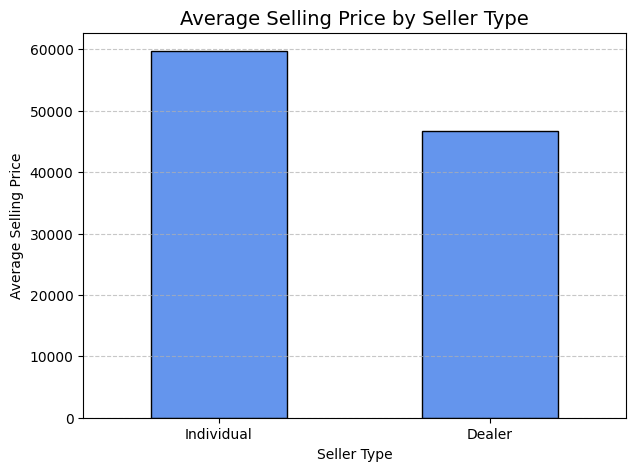

seller_type
Individual    59711.923223
Dealer        46666.666667
Name: selling_price, dtype: float64


In [ ]:
avg_price = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(7,5))
avg_price.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Average Selling Price by Seller Type', fontsize=14)
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Displaying the calculated averages
print(avg_price)

OBSERVATION: - The bar plot shows that individual sellers have a higher average selling price than Dealer sellers, indicating that Individual bikes are generally priced higher.

## 5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

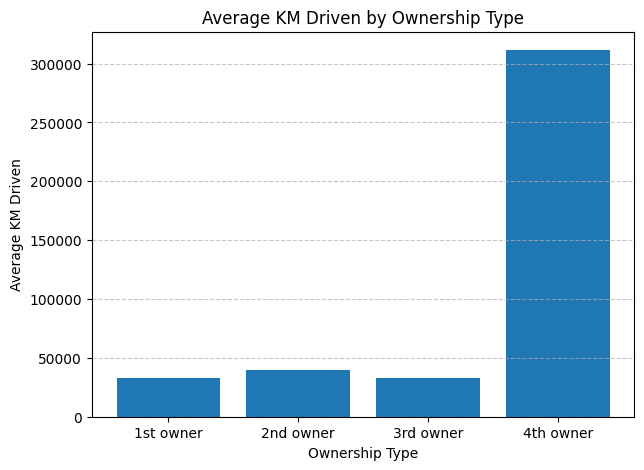


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
avg_km_driven = df.groupby('owner')['km_driven'].mean()

plt.figure(figsize=(7,5))
plt.xlabel('Ownership Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Driven by Ownership Type')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(avg_km_driven.index, avg_km_driven)
plt.show()
print()
print(avg_km_driven)



## 6. : Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [ ]:
print("Summary statistics of 'km_driven' before removing outliers:\n")
print(df['km_driven'].describe())
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df= df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\nSummary statistics of 'km_driven' after removing outliers:\n")
print(df['km_driven'].describe())


Summary statistics of 'km_driven' before removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Summary statistics of 'km_driven' after removing outliers:

count     1015.000000
mean     27819.597044
std      19062.189067
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      80000.000000
Name: km_driven, dtype: float64


## 7.  Create a scatter plot of year vs. selling_price to explore  the relationship between a bike's age and its price.


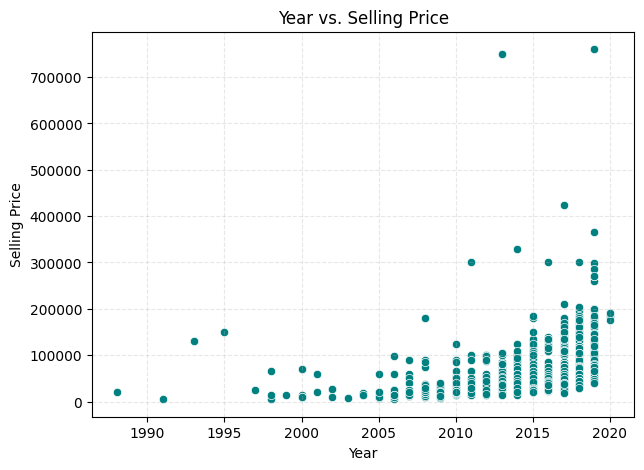

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,5))
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs. Selling Price')
plt.grid(True, linestyle='--', alpha=0.3)
sns.scatterplot(data=df, x='year', y='selling_price',color='teal')
plt.show()


OBSERVATION: -1. The selling price of bikes shows a clear upward trend over the years, especially after 2005.

2.Newer bikes tend to have significantly higher prices, with some exceeding ₹700,000 post-2015.

3.
The density of data points increases in recent years, indicating a growing market for high-value bikes.

## 8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


In [ ]:
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False,dtype='int')
df_encoded.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,0,1
1,Honda Dio,45000,2017,1st owner,5650,72752.5,0,1
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,0,1
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,0,1


## 9.  Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

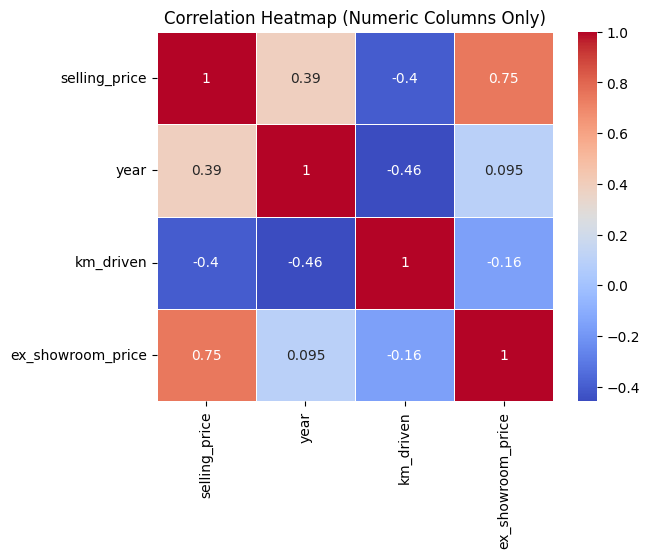

In [51]:
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

Selling Price VS EX-Showroom Price

-   Selling price and ex-showroom price have the strongest positive link in the dataset. This means bikes that originally cost more tend to sell for more later too

## 10. Summarize your findings in a brief report: ● What are the most important factors affecting a bike's selling price? ● Mention any data cleaning or feature engineering you performed.
- Key Factors Affecting Selling Price

    Ex-Showroom Price: This has the strongest positive correlation with selling price. Bikes that were expensive when new tend to retain higher resale value.

    Year of Manufacture: Newer bikes generally sell for more, showing a moderate positive correlation with selling price.

    Kilometers Driven: Slight negative correlation—bikes with higher usage tend to sell for less.

    Owner Count: Bikes with fewer previous owners often fetch better prices.
- Data Cleaning & Feature Engineering

    Removed Null Values: Cleaned missing entries in key columns like selling price and year.

    Converted Data Types: Ensured numeric columns (e.g., year, price) were properly formatted for analysis.

    Filtered Outliers: Removed extreme values in selling price and kilometers driven to improve model accuracy.

    Created Correlation Matrix: Used heatmap to identify relationships between numeric features.

    Visualized Trends: Plotted scatter plots and histograms to understand price distribution and year-wise trends.
